In [2]:
# Import required packages

from scipy import stats

import os, sys, time
import glob
from pathlib import Path

# Import matplotlib for plotting
%matplotlib inline

import matplotlib as mpl
mpl.use('TkAgg')
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap, cm

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy

from datetime import datetime

import rioxarray as rio

import h5py

from osgeo import gdal, ogr, gdalnumeric


import numpy as np, numpy.ma as ma
import statistics as stat
import rasterio
from rasterio.merge import merge
from rasterio.plot import show



In [4]:
# Get path for home directory
project_path = os.path.dirname(os.path.abspath("__file__"))

print(project_path)

/Users/Char/Dropbox/black_marble_VNP46A4


In [5]:
#Input VNP46A4

# enter the dir on your OS containing VIIRS files
inDir = project_path 

# Change to working directory                            
os.chdir(inDir)     

In [6]:
# Set output directory
outDir =  os.path.join(project_path, "Output_GeoTiffs/")

# If the output directory does not exist, create it
os.makedirs(outDir, exist_ok=True)

In [7]:
# Get a list of the H5 files
hdf5_files = [f for f in os.listdir(inDir) if f.endswith('.h5')]
hdf5_files.sort()

print(hdf5_files)


['VNP46A4.A2019001.h05v04.001.2021124124303.h5', 'VNP46A4.A2019001.h06v04.001.2021124214828.h5', 'VNP46A4.A2020001.h05v04.001.2021118145635.h5', 'VNP46A4.A2020001.h06v04.001.2021118144811.h5', 'VNP46A4.A2021001.h05v04.001.2022094115045.h5', 'VNP46A4.A2021001.h06v04.001.2022094115106.h5']


In [5]:
# Explore the structure of a single file from our hdf5_files list
inFile = h5py.File(hdf5_files[0], "r")   

# Create empty list
all_h5_objs = []     
# Walk through directory tree, retrieve objects and append to list         
inFile.visit(all_h5_objs.append)   

all_h5_objs

['HDFEOS',
 'HDFEOS/ADDITIONAL',
 'HDFEOS/ADDITIONAL/FILE_ATTRIBUTES',
 'HDFEOS/GRIDS',
 'HDFEOS/GRIDS/VIIRS_Grid_DNB_2d',
 'HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields',
 'HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/AllAngle_Composite_Snow_Covered',
 'HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/AllAngle_Composite_Snow_Covered_Num',
 'HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/AllAngle_Composite_Snow_Covered_Quality',
 'HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/AllAngle_Composite_Snow_Covered_Std',
 'HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/AllAngle_Composite_Snow_Free',
 'HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/AllAngle_Composite_Snow_Free_Num',
 'HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/AllAngle_Composite_Snow_Free_Quality',
 'HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/AllAngle_Composite_Snow_Free_Std',
 'HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/DNB_Platform',
 'HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/Land_Water_Mask',
 'HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/NearNadir_

In [6]:
# This function ingests the H5 files of interest, and outputs a geotiff
# inputHD5 : is the HD5 File of interest
# layer : specify which dataset is desired to be exported
# OutputFolder: specify the desired output directory

def processHD5(inputHD5, layer, OutputFolder):
    #Get File Name Prefix
    rasterFilePrefix = inputHD5[:-3].replace(".","_")
    ## Open HDF file
    hdflayer = gdal.Open(inputHD5, gdal.GA_ReadOnly)
    subhdflayer = hdflayer.GetSubDatasets()[layer][0]
    rlayer = gdal.Open(subhdflayer, gdal.GA_ReadOnly)
    #Subset the Layer Name
    outputLayerName = subhdflayer[97:]
    #print(outputLayerName)
    
    #outputFile
    outputRaster =  OutputFolder + rasterFilePrefix + "_" + outputLayerName + ".tif"
    print(outputRaster)
    
    HorizontalTileNumber = int(rlayer.GetMetadata_Dict()["HorizontalTileNumber"])
    VerticalTileNumber = int(rlayer.GetMetadata_Dict()["VerticalTileNumber"])
    WestBoundCoord = (10*HorizontalTileNumber) - 180
    NorthBoundCoord = 90-(10*VerticalTileNumber)
    
    EastBoundCoord = WestBoundCoord + 10
    SouthBoundCoord = NorthBoundCoord - 10
    
    EPSG = "-a_srs EPSG:4326" #WGS84
    
    translateOptionText = EPSG+" -a_ullr " + str(WestBoundCoord) + " " + str(NorthBoundCoord) + " " + str(EastBoundCoord) + " " + str(SouthBoundCoord)
    translateoptions = gdal.TranslateOptions(gdal.ParseCommandLine(translateOptionText))
    gdal.Translate(outputRaster,rlayer, options=translateoptions)

In [7]:
# Execute the function processHD5
# See above to identify which layer number is of interest

for file in hdf5_files:
    processHD5(file, 14, "/Users/Char/Dropbox/black_marble_VNP46A4/Output_Geotiffs/")



/Users/Char/Dropbox/black_marble_VNP46A4/Output_Geotiffs/VNP46A4_A2019001_h05v04_001_2021124124303_NearNadir_Composite_Snow_Free.tif


Warning 1: /Users/Char/Dropbox/black_marble_VNP46A4/Output_Geotiffs/VNP46A4_A2019001_h05v04_001_2021124124303_NearNadir_Composite_Snow_Free.tif: Metadata exceeding 32000 bytes cannot be written into GeoTIFF. Transferred to PAM instead.
Warning 1: /Users/Char/Dropbox/black_marble_VNP46A4/Output_Geotiffs/VNP46A4_A2019001_h06v04_001_2021124214828_NearNadir_Composite_Snow_Free.tif: Metadata exceeding 32000 bytes cannot be written into GeoTIFF. Transferred to PAM instead.


/Users/Char/Dropbox/black_marble_VNP46A4/Output_Geotiffs/VNP46A4_A2019001_h06v04_001_2021124214828_NearNadir_Composite_Snow_Free.tif
/Users/Char/Dropbox/black_marble_VNP46A4/Output_Geotiffs/VNP46A4_A2020001_h05v04_001_2021118145635_NearNadir_Composite_Snow_Free.tif


Warning 1: /Users/Char/Dropbox/black_marble_VNP46A4/Output_Geotiffs/VNP46A4_A2020001_h05v04_001_2021118145635_NearNadir_Composite_Snow_Free.tif: Metadata exceeding 32000 bytes cannot be written into GeoTIFF. Transferred to PAM instead.
Warning 1: /Users/Char/Dropbox/black_marble_VNP46A4/Output_Geotiffs/VNP46A4_A2020001_h06v04_001_2021118144811_NearNadir_Composite_Snow_Free.tif: Metadata exceeding 32000 bytes cannot be written into GeoTIFF. Transferred to PAM instead.


/Users/Char/Dropbox/black_marble_VNP46A4/Output_Geotiffs/VNP46A4_A2020001_h06v04_001_2021118144811_NearNadir_Composite_Snow_Free.tif
/Users/Char/Dropbox/black_marble_VNP46A4/Output_Geotiffs/VNP46A4_A2021001_h05v04_001_2022094115045_NearNadir_Composite_Snow_Free.tif


Warning 1: /Users/Char/Dropbox/black_marble_VNP46A4/Output_Geotiffs/VNP46A4_A2021001_h05v04_001_2022094115045_NearNadir_Composite_Snow_Free.tif: Metadata exceeding 32000 bytes cannot be written into GeoTIFF. Transferred to PAM instead.
Warning 1: /Users/Char/Dropbox/black_marble_VNP46A4/Output_Geotiffs/VNP46A4_A2021001_h06v04_001_2022094115106_NearNadir_Composite_Snow_Free.tif: Metadata exceeding 32000 bytes cannot be written into GeoTIFF. Transferred to PAM instead.


/Users/Char/Dropbox/black_marble_VNP46A4/Output_Geotiffs/VNP46A4_A2021001_h06v04_001_2022094115106_NearNadir_Composite_Snow_Free.tif


In [7]:
# Execute the function processHD5
# See above to identify which layer number is of interest

for file in hdf5_files:
    processHD5(file, 0, "/Users/Char/Dropbox/black_marble_VNP46A4/Output_Geotiffs/")

/Users/Char/Dropbox/black_marble_VNP46A4/Output_Geotiffs/VNP46A4_A2019001_h05v04_001_2021124124303_AllAngle_Composite_Snow_Covered.tif
/Users/Char/Dropbox/black_marble_VNP46A4/Output_Geotiffs/VNP46A4_A2019001_h06v04_001_2021124214828_AllAngle_Composite_Snow_Covered.tif
/Users/Char/Dropbox/black_marble_VNP46A4/Output_Geotiffs/VNP46A4_A2020001_h05v04_001_2021118145635_AllAngle_Composite_Snow_Covered.tif


Warning 1: /Users/Char/Dropbox/black_marble_VNP46A4/Output_Geotiffs/VNP46A4_A2019001_h05v04_001_2021124124303_AllAngle_Composite_Snow_Covered.tif: Metadata exceeding 32000 bytes cannot be written into GeoTIFF. Transferred to PAM instead.
Warning 1: /Users/Char/Dropbox/black_marble_VNP46A4/Output_Geotiffs/VNP46A4_A2019001_h06v04_001_2021124214828_AllAngle_Composite_Snow_Covered.tif: Metadata exceeding 32000 bytes cannot be written into GeoTIFF. Transferred to PAM instead.
Warning 1: /Users/Char/Dropbox/black_marble_VNP46A4/Output_Geotiffs/VNP46A4_A2020001_h05v04_001_2021118145635_AllAngle_Composite_Snow_Covered.tif: Metadata exceeding 32000 bytes cannot be written into GeoTIFF. Transferred to PAM instead.


/Users/Char/Dropbox/black_marble_VNP46A4/Output_Geotiffs/VNP46A4_A2020001_h06v04_001_2021118144811_AllAngle_Composite_Snow_Covered.tif
/Users/Char/Dropbox/black_marble_VNP46A4/Output_Geotiffs/VNP46A4_A2021001_h05v04_001_2022094115045_AllAngle_Composite_Snow_Covered.tif
/Users/Char/Dropbox/black_marble_VNP46A4/Output_Geotiffs/VNP46A4_A2021001_h06v04_001_2022094115106_AllAngle_Composite_Snow_Covered.tif


Warning 1: /Users/Char/Dropbox/black_marble_VNP46A4/Output_Geotiffs/VNP46A4_A2020001_h06v04_001_2021118144811_AllAngle_Composite_Snow_Covered.tif: Metadata exceeding 32000 bytes cannot be written into GeoTIFF. Transferred to PAM instead.
Warning 1: /Users/Char/Dropbox/black_marble_VNP46A4/Output_Geotiffs/VNP46A4_A2021001_h05v04_001_2022094115045_AllAngle_Composite_Snow_Covered.tif: Metadata exceeding 32000 bytes cannot be written into GeoTIFF. Transferred to PAM instead.
Warning 1: /Users/Char/Dropbox/black_marble_VNP46A4/Output_Geotiffs/VNP46A4_A2021001_h06v04_001_2022094115106_AllAngle_Composite_Snow_Covered.tif: Metadata exceeding 32000 bytes cannot be written into GeoTIFF. Transferred to PAM instead.


# Mosaic Raster Layers

In [3]:
# Set the path to the rasters to be mosaiced

raster_dir = outDir

# Change the working directory
os.chdir(raster_dir)    

# Create a list of rasters to be mosaiced
raster_list = [f for f in os.listdir(raster_dir) if f.endswith('.tif')]

print(raster_list)

# Subset that list to only one year of data
raster_2019 = list(filter(lambda k: 'A2019001' in k, raster_list))
raster_2021 = list(filter(lambda k: 'A2021001' in k, raster_list))


print("rasters in 2021 :", raster_2021)

['VNP46A4_A2021001_h06v04_001_2022094115106_NearNadir_Composite_Snow_Free.tif', 'VNP46A4_A2020001_h05v04_001_2021118145635_NearNadir_Composite_Snow_Free.tif', 'VNP46A4_A2020001_h06v04_001_2021118144811_NearNadir_Composite_Snow_Free.tif', 'VNP46A4_A2021001_h05v04_001_2022094115045_NearNadir_Composite_Snow_Free.tif', 'VNP46A4_A2019001_h06v04_001_2021124214828_NearNadir_Composite_Snow_Free.tif', 'VNP46A4_A2019001_h05v04_001_2021124124303_NearNadir_Composite_Snow_Free.tif']
rasters in 2021 : ['VNP46A4_A2021001_h06v04_001_2022094115106_NearNadir_Composite_Snow_Free.tif', 'VNP46A4_A2021001_h05v04_001_2022094115045_NearNadir_Composite_Snow_Free.tif']


In [4]:
# Create an empty list to hold the files in the data folder.
raster_to_mosaic = []

# Iterate over the available .tif files in the data folder to be mosaiced
for p in raster_2021:
    raster = rasterio.open(p)
    raster_to_mosaic.append(raster)

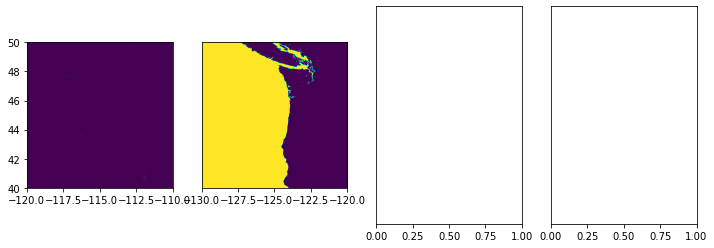

In [5]:
# Plot the individual rasters to be merged

import matplotlib.pyplot as plt
%matplotlib inline

# Create 4 plots next to each other
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(12, 4))

# Plot first four files
show(raster_to_mosaic[0], ax=ax1)
show(raster_to_mosaic[1], ax=ax2)
# show(raster_to_mosaic[2], ax=ax3)
# show(raster_to_mosaic[3], ax=ax4)

# Do not show y-ticks values in last three axis
for ax in [ax2, ax3, ax4]:
    ax.yaxis.set_visible(False)

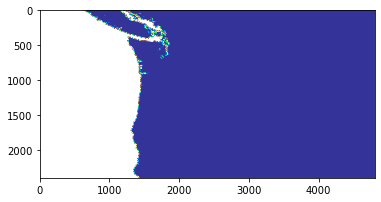

<AxesSubplot:>

In [6]:
# Use the merge() method from rasterio to create the mosaic, and create the output transformation parameters to use later.
mosaic, output = merge(raster_to_mosaic)

# Plot the result
show(mosaic, cmap='terrain')

In [7]:
# Copy the raster's metadata and update it to match the height and width of the mosaic

output_meta = raster.meta.copy()
output_meta.update(
    {"driver": "GTiff",
        "height": mosaic.shape[1],
        "width": mosaic.shape[2],
        "transform": output,
    }
)

In [8]:
# Write the mosaiced file in a local folder
output_path = os.path.join(project_path, 'Output_Mosaics/VNP46A4_A2021001_Mosaic.tif')

with rasterio.open(output_path, "w", **output_meta) as m:
    m.write(mosaic)